In [1]:
# Generic libraries
import numpy as np
import pandas as pd
import scipy as sp
import tqdm
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.context('seaborn')
from mpl_toolkits.mplot3d import Axes3D
from collections import namedtuple
from tabulate import tabulate
from IPython.display import Latex
from IPython.display import HTML
from matplotlib import rc


In [2]:
## autocorrelation estimate
def autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    #r = np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]) #slow method using the definition
    r = np.correlate(x, x, mode = 'full')[-n:] # fast method, same result!
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [83]:
# load all necessary equilibration info
path = "../data/03-eqnpt/thermodynamic_data/"
E2 = pd.read_csv(path+'tot_energy_npt.xvg', delimiter = '  ')#, skiprows=24)
T2 = pd.read_csv(path+'temperature_npt.xvg', delimiter = '  ')
d2 = pd.read_csv(path+'density_npt.xvg', delimiter = '  ')
# second NPT equilibration data
E3 = pd.read_csv(path+'tot_energy_npt2.xvg', delimiter = '  ')
T3 = pd.read_csv(path+'temperature_npt2.xvg', delimiter = '  ')
d3= pd.read_csv(path+'density_npt2.xvg', delimiter = '  ')

E2['t [ns]'] = E2['t']/1000 # switch to ns 
T2['t [ns]'] = T2['t']/1000
d2['t [ns]'] = d2['t']/1000
E3['t [ns]'] = E3['t']/1000
T3['t [ns]'] = T3['t']/1000
d3['t [ns]'] = d3['t']/1000

nframes = len(E1)
dt = 2500*0.002 #nstenergy*dt
time = np.arange(0, dt*nframes, dt)
t_ns = time / 1000
print(t_ns[-1], 'ns')


5.0 ns


/home/kryohi/.miniconda3/envs/mdanal/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [54]:
d2

,t,density,t [ns]
0,0.0,998.557373,0.000
1,5.0,1005.482605,0.005
2,10.0,1005.359497,0.010
3,15.0,1005.160461,0.015
4,20.0,1005.871338,0.020
...,...,...,...
996,4980.0,1005.668884,4.980
997,4985.0,1006.427612,4.985
998,4990.0,1005.976746,4.990
999,4995.0,1005.648438,4.995


Text(0, 0.5, 'Etot [kcal/mol]')

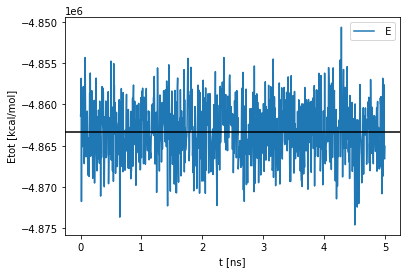

In [50]:
mean = (E2[" E"]).mean()
#print('Emean =', mean)
#E_all["TOTAL_rolling"] = E_all["TOT_E"].rolling(window=10,center=True).mean()
ax = E2.plot(x='t [ns]', y=' E')
ax.axhline(mean, color='black', label="TOTAL mean")
#E_all.plot(x='t [ns]', y='TOTAL_rolling', ax=ax, color='red')
plt.ylabel("Etot [kcal/mol]")

309.9770543036963


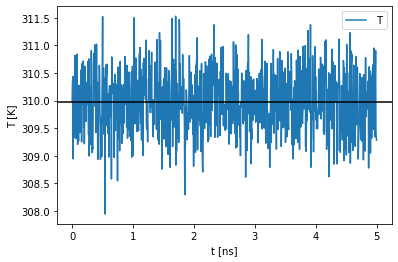

In [88]:
mean = (T2[" T"]).mean()
ax = T2.plot(x='t [ns]', y=' T')
ax.axhline(mean, color='black', label="TOTAL mean")
plt.ylabel("T [K]")
print(mean)

310.0038622587412


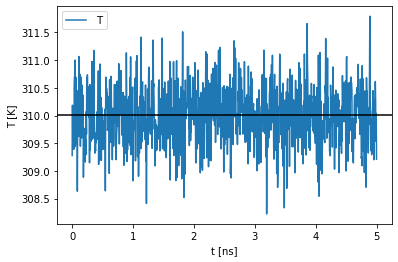

In [90]:
mean = (T3[" T"]).mean()
ax = T3.plot(x='t [ns]', y=' T')
ax.axhline(mean, color='black', label="TOTAL mean")
plt.ylabel("T [K]")
print(mean)

1006.0806721888111


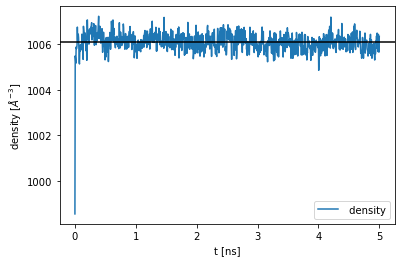

In [87]:
mean = (d2[" density"]).mean()
ax = d2.plot(x='t [ns]', y=' density')
ax.axhline(mean, color='black', label="TOTAL mean")
plt.ylabel("density [$\AA^{-3}$]")
print(mean)

1008.0478965634364


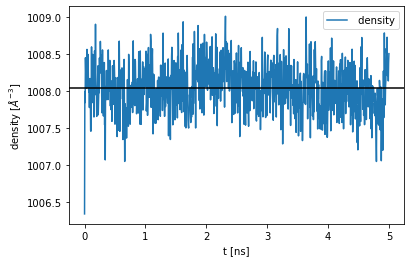

In [86]:
mean = (d3[" density"]).mean()
ax = d3.plot(x='t [ns]', y=' density')
ax.axhline(mean, color='black', label="TOTAL mean")
plt.ylabel("density [$\AA^{-3}$]")
print(mean)

-4867107.437562438


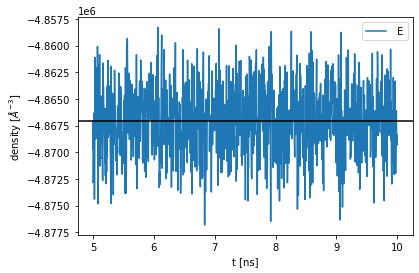

In [89]:
mean = (E3[" E"]).mean()
ax = E3.plot(x='t [ns]', y=' E')
ax.axhline(mean, color='black', label="TOTAL mean")
plt.ylabel("density [$\AA^{-3}$]")
print(mean)

Text(0, 0.5, 'density [$\\AA^{-3}$]')

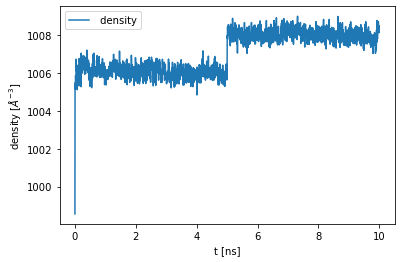

In [79]:
d3_shift = d3
d3_shift["t [ns]"] = d3["t [ns]"] + 5
d_all = pd.concat([d2, d3_shift]) # 

ax = d_all.plot(x='t [ns]', y=' density')
plt.ylabel("density [$\AA^{-3}$]")

Text(0, 0.5, 'E [kcal/mol]')

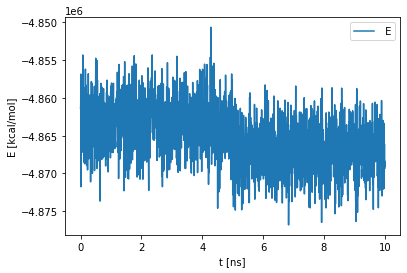

In [84]:
E3_shift = E3
E3_shift["t [ns]"] = E3["t [ns]"] + 5
E_all = pd.concat([E2, E3_shift]) # 

ax = E_all.plot(x='t [ns]', y=' E')
plt.ylabel("E [kcal/mol]")